# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [12]:
import MeCab
tagger = MeCab.Tagger()
with open("./data/neko.txt","r") as f:
    mecab_result = tagger.parse(f.read())
with open("./data/neko.txt.mecab","w") as f:
    f.write(mecab_result)

## 30. 形態素解析結果の読み込み
### 形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [25]:
def read_mecab_file(file_name:str):
    with open(file_name,"r") as f:
        f.readline()
        f.readline()
        result = []
        for row in f.readlines():
            if row == 'EOS\n':
                break
            text = row.split("\t")
            pos = text[1].replace("\n","").split(",")
            dic = {"surface" : text[0],
                   "base" : pos[6],
                   "pos" : pos[0],
                   "pos1" : pos[1]}
            result.append(dic)
    return result
mecab_file = read_mecab_file("./data/neko.txt.mecab")
mecab_file

[{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
 {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
 {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
 {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
 {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'},
 {'surface': '生れ', 'base': '生れる', 'pos': '動詞', 'pos1': '自立'},
 {'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'},
 {'surface': 'か', 'bas

## 31. 動詞Permalink
### 動詞の表層形をすべて抽出せよ．

In [27]:
import pandas as pd
data = pd.DataFrame(mecab_file)
data.surface.unique()

array(['吾輩', 'は', '猫', ..., 'ぎりご', '切り落し', '韲'], dtype=object)

## 32. 動詞の基本形Permalink
### 動詞の基本形をすべて抽出せよ．

In [29]:
data.base.unique()

array(['吾輩', 'は', '猫', ..., '減', 'のばす', '拷問'], dtype=object)

## 33. 「AのB」Permalink
### 2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [75]:
def mk_words(data:pd.DataFrame,index_list:list):
    return "".join([data.loc[index].surface for index in index_list])

result = []
for index in data[data["surface"] == "の"].index:
    before = data.loc[index-1]
    after = data.loc[index+1]
    if before["pos"] == "名詞" and after["pos"] == "名詞":
        result.append(mk_words(data,[index-1,index,index+1]))
result

['彼の掌',
 '掌の上',
 '書生の顔',
 'はずの顔',
 '顔の真中',
 '穴の中',
 '書生の掌',
 '掌の裏',
 '何の事',
 '肝心の母親',
 '藁の上',
 '笹原の中',
 '池の前',
 '池の上',
 '一樹の蔭',
 '垣根の穴',
 '隣家の三',
 '時の通路',
 '一刻の猶予',
 '家の内',
 '彼の書生',
 '以外の人間',
 '前の書生',
 'おさんの隙',
 'おさんの三',
 '胸の痞',
 '家の主人',
 '主人の方',
 '鼻の下',
 '吾輩の顔',
 '自分の住',
 '吾輩の主人',
 '家のもの',
 'うちのもの',
 '彼の書斎',
 '本の上',
 '皮膚の色',
 '本の上',
 '彼の毎夜',
 '以外のもの',
 '主人の傍',
 '彼の膝',
 '膝の上',
 '経験の上',
 '飯櫃の上',
 '炬燵の上',
 'ここのうち',
 '供の寝床',
 '彼等の中間',
 '供の一',
 '例の神経',
 '性の主人',
 '次の部屋',
 '自分の勝手',
 '吾輩の方',
 '台所の板の間',
 '吾輩の尊敬',
 '向の白',
 '玉のよう',
 'そこの家',
 '家の書生',
 '裏の池',
 '親子の愛',
 'もっともの議論',
 '刺の頭',
 '鰡の臍',
 '彼等のため',
 '軍人の家',
 '代言の主人',
 '教師の家',
 '猫の時節',
 '吾輩の家',
 '家の主人',
 'だらけの英文',
 '胃弱の癖',
 '後架の中',
 '平の宗',
 '月の月給',
 '当分の間',
 '下のよう',
 '今更のよう',
 '主人の述懐',
 '彼の友',
 '金縁の眼鏡',
 '主人の顔',
 '内の想像',
 '訳のもの',
 '利の大家',
 '金縁の裏',
 '吾輩の後ろ',
 '彼の友',
 '吾輩の輪廓',
 '顔のあたり',
 '上乗の出来',
 '顔の造作',
 '他の猫',
 '不器量の吾輩',
 '吾輩の主人',
 '斯産の猫',
 '斑入りの皮膚',
 '主人の彩色',
 '種の色',
 '身内の筋肉',
 '主人の予定',
 '座敷の中',
 '悪口の言いよう',
 '人の気',
 '彼の背中',
 'こっちの便利',
 '自己

## 34. 名詞の連接Permalink
### 名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [81]:
def continue_index(index_list:list):
    start_index = 0
    continue_lists = []
    continue_list = []
    for index in index_list:
        if start_index != index:
            if len(continue_list) > 1:
                continue_lists.append(continue_list)
            continue_list = []
            start_index = index
        continue_list.append(index)
        start_index += 1
    return continue_lists

continue_noun_list = continue_index(data[data.pos == "名詞"].index)
connected_noun = [mk_words(data,noun_list) for noun_list in continue_noun_list]
connected_noun

['人間中',
 '一番獰悪',
 '時妙',
 '一毛',
 'その後猫',
 '一度',
 'ぷうぷうと煙',
 '邸内',
 '三毛',
 '書生以外',
 '四五遍',
 'この間おさん',
 '三馬',
 '御台所',
 'まま奥',
 '住家',
 '終日書斎',
 '勉強家',
 '勉強家',
 '勤勉家',
 '二三ページ',
 '主人以外',
 '限り吾輩',
 '朝主人',
 '一番心持',
 '二人',
 '一つ床',
 '一人',
 '最後大変',
 '——猫',
 '神経胃弱性',
 '物指',
 '尻ぺたをひどく',
 '言語同断',
 '家内総がかり',
 '筋向',
 '白君',
 '度毎',
 '白君',
 '先日玉',
 '四疋',
 '三日目',
 '四疋',
 '白君',
 '我等猫族',
 '家族的生活',
 '三毛君',
 '所有権',
 '我々同族間',
 '目刺',
 '一番先',
 '彼等人間',
 '我等',
 '吾人',
 '白君',
 '三毛君',
 'いくら人間',
 '間違いだらけ',
 '後架先生',
 '宗盛',
 '宗盛',
 '月給日',
 '水彩絵具',
 '毎日毎日書斎',
 '人の',
 '自ら筆',
 '眼鏡越',
 '一室内',
 '以太利',
 '大家アンドレア・デル・サルト',
 '露華',
 '寒鴉',
 'これ一幅',
 '活画',
 '翌日吾輩',
 '一分',
 '辛棒',
 '今吾輩',
 '今吾輩',
 '波斯産',
 'ただ一種',
 '上不思議',
 '盲猫',
 '心中ひそか',
 'いくらアンドレア・デル・サルト',
 '一分',
 'あと大',
 '壊わし',
 '馬鹿野郎',
 '馬鹿野郎',
 '辛棒',
 '馬鹿野郎呼わり',
 '平生吾輩',
 '馬鹿野郎',
 '元来人間',
 'みんな増長',
 '先どこ',
 '数倍',
 '十坪',
 '腹加減',
 '穏かな日',
 '二時頃',
 '昼飯後',
 '運動かたがた',
 '一本一本',
 '杉垣',
 '前後不覚',
 '庭内',
 '忍び入り',
 '黒猫',
 '柔毛',
 '出ずるよう',
 '猫中',
 '杉垣',
 '二三枚',
 'ぐべき力',
 '険呑',
 '時吾輩',
 '言葉付

## 35. 単語の出現頻度Permalink
### 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [86]:
data.groupby("surface").count().sort_values("base",ascending=False)

,base,pos,pos1
surface,,,
の,9194,9194,9194
。,7486,7486,7486
て,6873,6873,6873
、,6772,6772,6772
は,6422,6422,6422
...,...,...,...
凝り固まっ,1,1,1
物音,1,1,1
凝結,1,1,1


## 36. 頻度上位10語Permalink
### 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<AxesSubplot: xlabel='surface'>

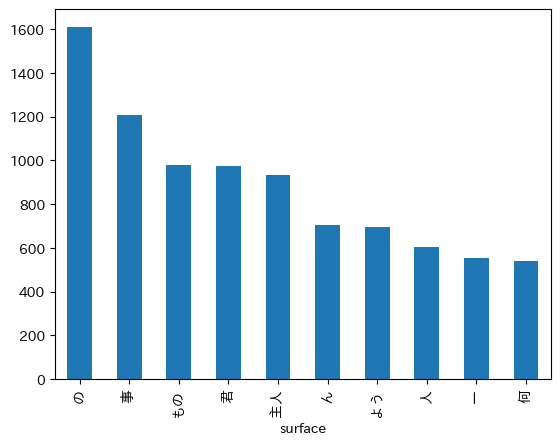

In [141]:
import matplotlib.pyplot as plt
import japanize_matplotlib

data[data.pos.isin(["名詞"])].groupby("surface").base.count().rename("count").sort_values(ascending=False).head(10).plot.bar()

## 37. 「猫」と共起頻度の高い上位10語Permalink
### 「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<AxesSubplot: xlabel='surface'>

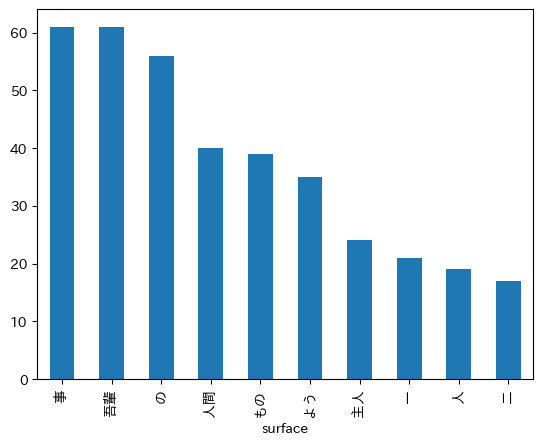

In [143]:
start_index = 0
result_df = pd.DataFrame()
for period_index in data[data.pos1 == "句点"].index:
    neko_df = data.loc[start_index:period_index]
    if not neko_df[neko_df.surface == "猫"].empty:
        result_df = pd.concat([result_df,neko_df])
    start_index = period_index + 1
result_df = result_df[result_df.surface != "猫"]
result_df[result_df.pos.isin(["名詞"])].groupby("surface").base.count().rename("count").sort_values(ascending=False).head(10).plot.bar()

## 38. ヒストグラムPermalink
### 単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

<AxesSubplot: xlabel='surface', ylabel='count'>

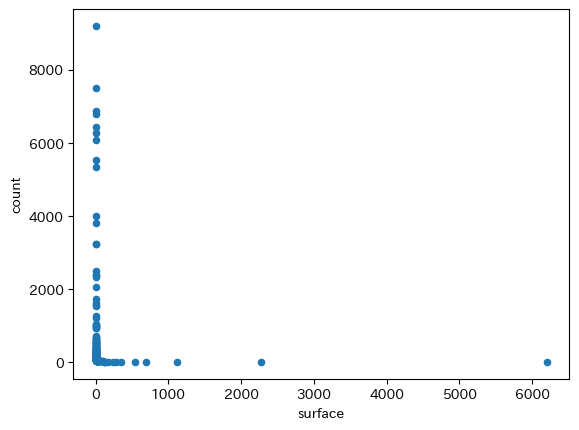

In [152]:
data.groupby("surface").base.count().rename("count").reset_index().groupby("count").count().reset_index().plot.scatter(y="surface",y="count")

## 39. Zipfの法則Permalink
### 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

<AxesSubplot: xlabel='surface', ylabel='count'>

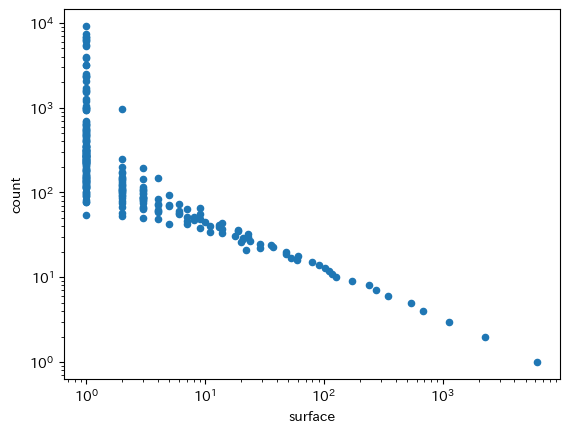

In [155]:
data.groupby("surface").base.count().rename("count").reset_index().groupby("count").count().reset_index().plot.scatter(x="surface",y="count",logx=True,logy=True)